<a href="https://colab.research.google.com/github/DineshFoujdar/Fuel-Efficiency-Optimization-MPG-Prediction/blob/main/Fuel_Efficiency_Optimization_MPG_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.preprocessing import MaxAbsScaler,QuantileTransformer,StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


#2. Loading the Dataset

In [2]:
!gdown https://drive.google.com/uc?id={'1MD6-WgXjk9uZgmMvguNdzdzqm2XRJJDE'}

import pandas as pd
df = pd.read_csv('Reduced-Data.csv')
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1MD6-WgXjk9uZgmMvguNdzdzqm2XRJJDE
From (redirected): https://drive.google.com/uc?id=1MD6-WgXjk9uZgmMvguNdzdzqm2XRJJDE&confirm=t&uuid=b975e7e3-5a09-4811-9e98-f91e5299725d
To: /content/Reduced-Data.csv
100% 566M/566M [00:02<00:00, 245MB/s]


,r,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
0,1,1337.0,1446.0,126.0,lpg,B,999.0,74.0,NaN,1.70,7.8,NaN
1,1,1670.0,1782.0,125.0,petrol,H,2487.0,131.0,NaN,0.80,5.5,NaN
2,1,2044.0,2187.0,0.0,electric,E,NaN,221.0,172.0,NaN,NaN,440.0
3,1,1493.0,1576.0,135.0,petrol,M,1199.0,96.0,NaN,2.00,6.0,NaN
4,1,1649.0,1814.0,131.0,petrol,H,1598.0,132.0,NaN,0.59,5.8,NaN


#Data Preprocessing

In [3]:
df.describe()

,r,m (kg),Mt,Ewltp (g/km),ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
count,10734656.0,1.073423e+07,1.021110e+07,1.071376e+07,9.064282e+06,1.069928e+07,2.360004e+06,5.767908e+06,7.551492e+06,2.336062e+06
mean,1.0,1.546215e+03,1.656073e+03,1.066655e+02,1.545012e+03,1.153268e+02,1.718821e+02,1.524171e+00,5.409758e+00,3.180773e+02
std,0.0,3.610450e+02,3.741814e+02,5.956828e+01,5.281492e+02,6.258912e+01,2.892732e+01,5.029387e-01,1.785632e+00,1.918245e+02
min,1.0,4.950000e+02,6.150000e+02,0.000000e+00,6.580000e+02,8.000000e+00,1.100000e+01,5.000000e-01,1.000000e-01,1.200000e+01
25%,1.0,1.270000e+03,1.376000e+03,1.010000e+02,1.197000e+03,7.400000e+01,1.550000e+02,1.100000e+00,4.900000e+00,7.700000e+01
50%,1.0,1.480000e+03,1.585000e+03,1.230000e+02,1.497000e+03,1.000000e+02,1.660000e+02,1.700000e+00,5.500000e+00,3.800000e+02
75%,1.0,1.765000e+03,1.881000e+03,1.390000e+02,1.968000e+03,1.320000e+02,1.790000e+02,1.960000e+00,6.100000e+00,4.910000e+02
max,1.0,4.953000e+03,4.574000e+03,5.430000e+02,7.997000e+03,1.177000e+03,5.470000e+02,7.000000e+00,2.900000e+01,8.830000e+02


In [4]:
df.isnull().sum()

,0
r,0
m (kg),425
Mt,523557
Ewltp (g/km),20891
Ft,0
Fm,1
ec (cm3),1670374
ep (KW),35372
z (Wh/km),8374652
Erwltp (g/km),4966748


In [5]:
print(df['Electric range (km)'].mean())
print(df['Electric range (km)'].median())
print(df['Electric range (km)'].mode())
print(df['Electric range (km)'].std())
print(df['Electric range (km)'].var())
print(df['Electric range (km)'].min())
print(df['Electric range (km)'].max())

318.0772616480213
380.0
0    533.0
Name: Electric range (km), dtype: float64
191.82446223609844
36796.62431216836
12.0
883.0


In [6]:
df['Electric range (km)'].fillna(df['Electric range (km)'].mean(),inplace=True)

<ipython-input-6-f6ea4e4b2ff6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric range (km)'].fillna(df['Electric range (km)'].mean(),inplace=True)


In [7]:
df.drop('r',inplace=True,axis=1)
df.drop('z (Wh/km)',inplace=True,axis=1)
df.drop('Mt',inplace=True,axis=1)
df.drop('Ewltp (g/km)',axis=1,inplace=True)
df.drop('Erwltp (g/km)',inplace=True,axis=1)
df.shape

(10734656, 7)

**r:** The feature might not be relevant to the analysis or target variable.

**z (Wh/km):** represents energy consumption per kilometer in watt-hours.

*Drop Reason :* The feature may be highly correlated with other numerical features (e.g., fuel efficiency, energy usage metrics), leading to multicollinearity.


**Mt:** Could refer to vehicle mass type or a classification.

*Drop Reason :* Could be unrelated or redundant if similar information is already captured by other features (e.g., vehicle weight or engine type).

**Ewltp (g/km):** Redundant emissions data not directly useful.

**Erwltp (g/km):** Less reliable real-world emissions data or redundant.

In [8]:
df.dropna(inplace=True)
df.head()

,m (kg),Ft,Fm,ec (cm3),ep (KW),Fuel consumption,Electric range (km)
0,1337.0,lpg,B,999.0,74.0,7.8,318.077262
1,1670.0,petrol,H,2487.0,131.0,5.5,318.077262
3,1493.0,petrol,M,1199.0,96.0,6.0,318.077262
4,1649.0,petrol,H,1598.0,132.0,5.8,318.077262
5,1560.0,petrol,H,1987.0,112.0,5.2,318.077262


In [9]:
df.describe()

,m (kg),ec (cm3),ep (KW),Fuel consumption,Electric range (km)
count,7.550972e+06,7.550972e+06,7.550972e+06,7.550972e+06,7.550972e+06
mean,1.481844e+03,1.543563e+03,1.059520e+02,5.409906e+00,2.959435e+02
std,3.273783e+02,5.293588e+02,5.172205e+01,1.785300e+00,7.113635e+01
min,5.700000e+02,6.580000e+02,8.000000e+00,1.000000e-01,1.200000e+01
25%,1.250000e+03,1.197000e+03,7.400000e+01,4.900000e+00,3.180773e+02
50%,1.429000e+03,1.497000e+03,9.600000e+01,5.500000e+00,3.180773e+02
75%,1.650000e+03,1.968000e+03,1.160000e+02,6.100000e+00,3.180773e+02
max,4.312000e+03,7.993000e+03,1.177000e+03,2.900000e+01,5.200000e+02


In [10]:
df.isnull().sum()

,0
m (kg),0
Ft,0
Fm,0
ec (cm3),0
ep (KW),0
Fuel consumption,0
Electric range (km),0


#4. Preprocessing Pipelines

In [11]:
encoder_pipe = Pipeline(
steps=[
    ('encoder',OneHotEncoder(handle_unknown='ignore',drop='first'))
])

This pipeline is designed to handle categorical data by applying one-hot encoding.

**OneHotEncoder(handle_unknown='ignore', drop='first'):**

1. Transforms categorical variables into a binary matrix (one-hot encoding).

2. Drops the first category (drop='first') to avoid multicollinearity in models like linear regression.

3. Ignores unknown categories during transformation (handle_unknown='ignore'), which prevents errors when new categories appear in test data.

In [12]:
scaling_pipe = Pipeline(steps=[
    ('Scaling',StandardScaler()),
    ('Transformer',QuantileTransformer())
])

This pipeline is designed to preprocess numerical data by scaling and transforming it.

**StandardScaler():**

Standardizes numerical features by removing the mean and scaling to unit variance (z-score normalization).

**QuantileTransformer():**

1. Maps the features to a uniform or normal distribution by ranking and transforming data to a specified quantile space.

2. Helps make features more robust to outliers and skewed distributions.

In [13]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat',encoder_pipe,['Fm','Ft']),
        ('scale_trasform',scaling_pipe,['m (kg)','ec (cm3)','ep (KW)'])
    ]
)

This combines the categorical and numerical transformations using the ColumnTransformer:

#5. Exploratory Data Analysis (EDA)

In [14]:
df['Ft'].value_counts()

,count
Ft,
petrol,4979753
diesel,1548966
petrol/electric,685860
lpg,258699
e85,46155
diesel/electric,24618
ng,6816
PETROL,59
PETROL/ELECTRIC,28


**These are the type of fuel**

petrol

diesel

petrol/electric

lpg

e85

diesel/electric

natural gas

In [15]:
df['Fm'].value_counts()

,count
Fm,
M,4294039
H,2279844
P,710506
B,259259
F,7324


**M: Diesel** (motor diesel-powered vehicles)

**H: Hybrid** (a combination of an internal combustion engine and an electric motor).

**P: Petrol** (gasoline-powered vehicles).

**B: Battery Electric Vehicle** (fully electric, powered by batteries).

**F: Fuel Cell Electric Vehicle** (uses hydrogen fuel cells to generate electricity).

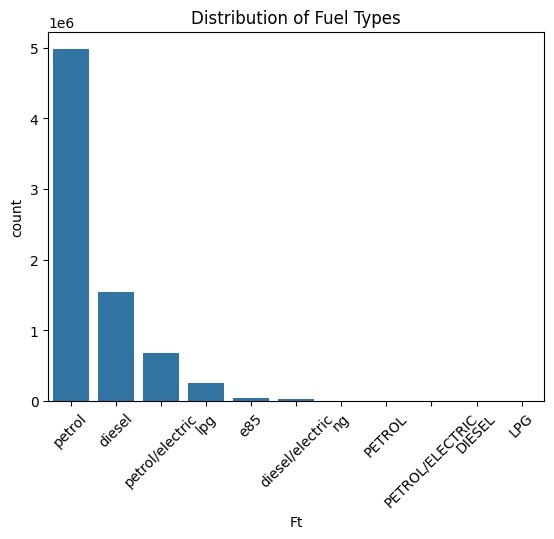

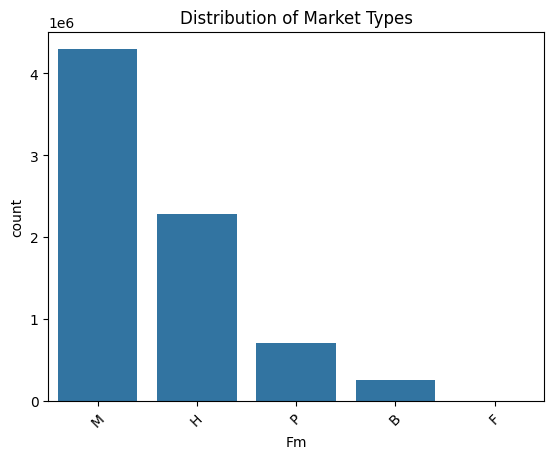

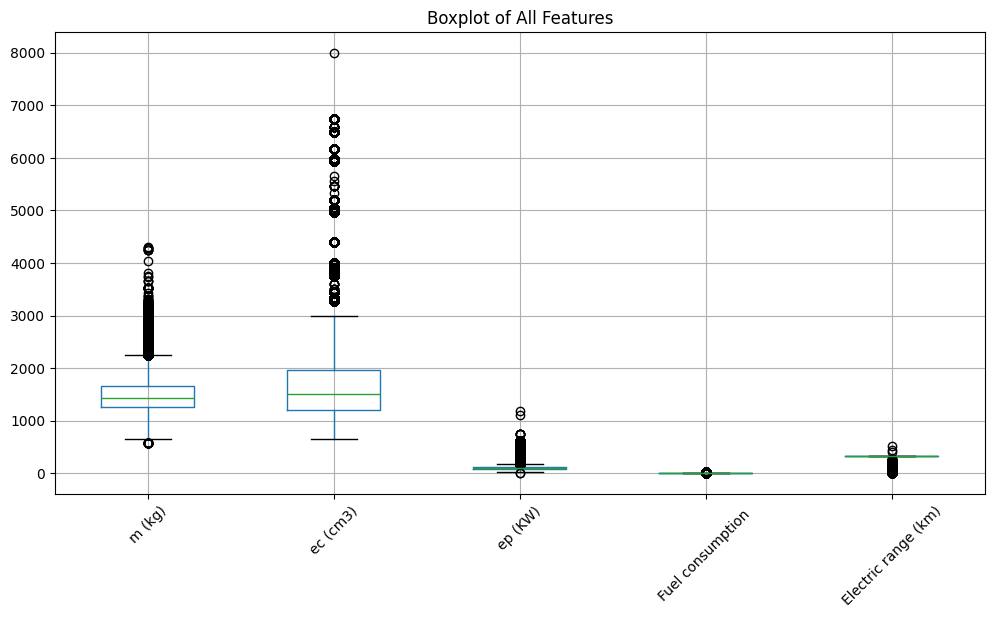

In [16]:
# Countplot for fuel type (Ft)
sns.countplot(data=df, x='Ft', order=df['Ft'].value_counts().index)
plt.title("Distribution of Fuel Types")
plt.xticks(rotation=45)
plt.show()

# Countplot for market type (Fm)
sns.countplot(data=df, x='Fm', order=df['Fm'].value_counts().index)
plt.title("Distribution of Market Types")
plt.xticks(rotation=45)
plt.show()

# Boxplot to detect outliers
df.boxplot(rot=45, figsize=(12, 6))
plt.title("Boxplot of All Features")
plt.show()


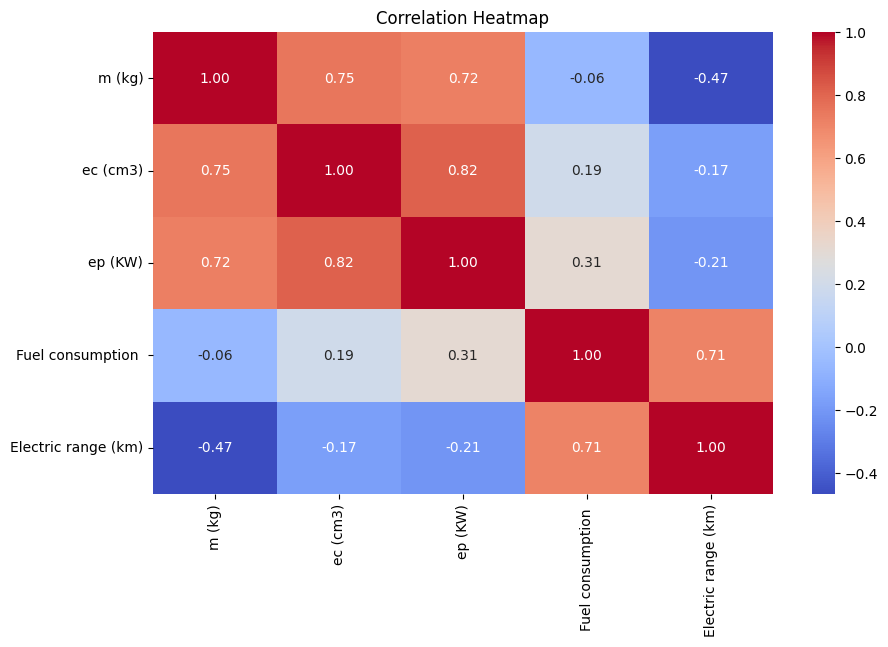

In [17]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#6. Model Training and Evaluation

Linear Regression

Decision Trees

Random Forest

Gradient Boosting Machines (GBM)


###Linear Regression

In [18]:
# Splitting the dataset
X = df.drop('Fuel consumption ',axis=1)
y = df['Fuel consumption ']

Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [19]:
# Linear Regression Pipeline
linear_reg = Pipeline(steps=[
    ('preprocessor',preprocess),
    ('LinearRegression',LinearRegression())
])

# Training the model
linear_reg.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fm', 'Ft']),
                                                 ('scale_trasform',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler()),
                                                                  ('Transformer',
                                                                   QuantileTransformer())]),
                                                  ['m (kg)', 'ec (cm3)',
                                                   'ep (KW)'])])),
                ('LinearRegression', LinearRegression())])

In [20]:
# Predictions and Evaluation
lin_pred = linear_reg.predict(Xtest)
print("R2_score: ",r2_score(ytest,lin_pred))
print("Mean_Absolute_Error: ", mean_absolute_error(ytest,lin_pred))
print("Mean_Squared_Error:", mean_squared_error(ytest,lin_pred))
print("Explained_Varience_Score: ", explained_variance_score(ytest,lin_pred))
print("root_mean_squarred_error: ",mean_squared_error(ytest,lin_pred)**1/2)

R2_score:  0.7776644675490489
Mean_Absolute_Error:  0.5480074557314432
Mean_Squared_Error: 0.7087343660061622
Explained_Varience_Score:  0.7776644723276953
root_mean_squarred_error:  0.3543671830030811


###Decision Tree Regressor


In [21]:
# Decision Tree Regressor Pipeline
des_reg = Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('Decison Tree',DecisionTreeRegressor())
    ]
)

# Training the model
des_reg.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fm', 'Ft']),
                                                 ('scale_trasform',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler()),
                                                                  ('Transformer',
                                                                   QuantileTransformer())]),
                                                  ['m (kg)', 'ec (cm3)',
                                                   'ep (KW)'])])),
                ('Decison Tree', DecisionTreeRegressor())])

In [22]:
# Predictions and Evaluation
dec_pred = des_reg.predict(Xtest)
print("R2_score: ",r2_score(ytest,dec_pred))
print("Mean_Absolute_Error: ", mean_absolute_error(ytest,dec_pred))
print("Mean_Squared_Error:", mean_squared_error(ytest,dec_pred))
print("Explained_Varience_Score: ", explained_variance_score(ytest,dec_pred))
print("root_mean_squarred_error: ",mean_squared_error(ytest,dec_pred)**1/2)

R2_score:  0.9814926912188511
Mean_Absolute_Error:  0.11077248881984446
Mean_Squared_Error: 0.058995364397643295
Explained_Varience_Score:  0.9814927281015148
root_mean_squarred_error:  0.029497682198821647


###Random Forest Regressor

In [23]:
df_sample = df.sample(frac=0.3, random_state=42)  # 30% of the data
X1 = df_sample.drop('Fuel consumption ',axis=1)
y1 = df_sample['Fuel consumption ']

X1train, X1test, y1train,y1test = train_test_split(X1,y1,test_size=0.2)
# Optimize Random Forest Parameters
rf_reg = Pipeline(steps=[
    ('preprocessor', preprocess),  # Assuming `preprocess` is defined
    ('model', RandomForestRegressor( random_state=42, n_estimators=100, max_depth=10,  n_jobs=-1 ))
])

# Training the Model
rf_reg.fit(X1train, y1train)
# Predictions and Evaluation
rf_pred = rf_reg.predict(Xtest)
print("\nRandom Forest Regressor Metrics:")
print("R2 Score:", r2_score(ytest, rf_pred))
print("Mean Absolute Error:", mean_absolute_error(ytest, rf_pred))
print("Mean Squared Error:", mean_squared_error(ytest, rf_pred))
print("Explained Variance Score:", explained_variance_score(ytest, rf_pred))




Random Forest Regressor Metrics:
R2 Score: 0.9504011428406772
Mean Absolute Error: 0.246146621668873
Mean Squared Error: 0.15810524838713189
Explained Variance Score: 0.9504011871248789


###Gradient Boosting Regressor

In [24]:
# Gradient Boosting Regressor Pipeline
boosting_reg = Pipeline(steps=[
    ('preprocessor', preprocess),  # Assuming `preprocess` is defined
    ('model', GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3))
])

# Training the Model
boosting_reg.fit(X1train, y1train)

# Predictions and Evaluation
boost_pred = boosting_reg.predict(Xtest)
print("\nGradient Boosting Regressor Metrics:")
print("R2 Score:", r2_score(ytest, boost_pred))
print("Mean Absolute Error:", mean_absolute_error(ytest, boost_pred))
print("Mean Squared Error:", mean_squared_error(ytest, boost_pred))
print("Explained Variance Score:", explained_variance_score(ytest, boost_pred))


Gradient Boosting Regressor Metrics:
R2 Score: 0.933691520168912
Mean Absolute Error: 0.30944200308170655
Mean Squared Error: 0.21137016605425418
Explained Variance Score: 0.9336915208080852


###XGBoost Regressor

In [25]:
# XGBoost Regressor Pipeline
xgb_reg = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('model', XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6,  n_jobs=-1 ))
])

# Training the Model
xgb_reg.fit(Xtrain, ytrain)

# Predictions and Evaluation
xgb_pred = xgb_reg.predict(Xtest)
print("\nXGBoost Regressor Metrics:")
print("R2 Score:", r2_score(ytest, xgb_pred))
print("Mean Absolute Error:", mean_absolute_error(ytest, xgb_pred))
print("Mean Squared Error:", mean_squared_error(ytest, xgb_pred))
print("Explained Variance Score:", explained_variance_score(ytest, xgb_pred))


XGBoost Regressor Metrics:
R2 Score: 0.9639963489880634
Mean Absolute Error: 0.20599759038168397
Mean Squared Error: 0.11476809168809425
Explained Variance Score: 0.9639963633620866


###Model Comparison

In [34]:
# Importing necessary libraries
import pandas as pd

# Creating a dictionary to store metrics for each model
comparison_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'R2 Score': [
        r2_score(ytest, lin_pred),
        r2_score(ytest, dec_pred),
        r2_score(ytest, rf_pred),
        r2_score(ytest, boost_pred),
        r2_score(ytest, xgb_pred)
    ],
    'Mean Absolute Error': [
        mean_absolute_error(ytest, lin_pred),
        mean_absolute_error(ytest, dec_pred),
        mean_absolute_error(ytest, rf_pred),
        mean_absolute_error(ytest, boost_pred),
        mean_absolute_error(ytest, xgb_pred)
    ],
    'Mean Squared Error': [
        mean_squared_error(ytest, lin_pred),
        mean_squared_error(ytest, dec_pred),
        mean_squared_error(ytest, rf_pred),
        mean_squared_error(ytest, boost_pred),
        mean_squared_error(ytest, xgb_pred)
    ],
    'Explained Variance Score': [
        explained_variance_score(ytest, lin_pred),
        explained_variance_score(ytest, dec_pred),
        explained_variance_score(ytest, rf_pred),
        explained_variance_score(ytest, boost_pred),
        explained_variance_score(ytest, xgb_pred)
    ],
    'Root Mean Squared Error': [
        mean_squared_error(ytest, lin_pred) ** 0.5,
        mean_squared_error(ytest, dec_pred) ** 0.5,
        mean_squared_error(ytest, rf_pred) ** 0.5,
        mean_squared_error(ytest, boost_pred) ** 0.5,
        mean_squared_error(ytest, xgb_pred) ** 0.5
    ]
}

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame(comparison_metrics)

# Displaying the comparison
print("\nModel Comparison:")
print(comparison_df)

# Optional: Highlight the best metrics for each evaluation criterion
best_models = comparison_df.style.highlight_min(subset=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'], color='lightgreen').highlight_max(subset=['R2 Score', 'Explained Variance Score'], color='lightgreen')
best_models



Model Comparison:
               Model  R2 Score  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression  0.778963             0.544515            0.704597   
1      Decision Tree  0.909092             0.270097            0.289786   
2      Random Forest  0.950401             0.246147            0.158105   
3  Gradient Boosting  0.933692             0.309442            0.211370   
4            XGBoost  0.963996             0.205998            0.114768   

   Explained Variance Score  Root Mean Squared Error  
0                  0.779016                 0.839403  
1                  0.912324                 0.538317  
2                  0.950401                 0.397625  
3                  0.933692                 0.459750  
4                  0.963996                 0.338774  


,Model,R2 Score,Mean Absolute Error,Mean Squared Error,Explained Variance Score,Root Mean Squared Error
0,Linear Regression,0.778963,0.544515,0.704597,0.779016,0.839403
1,Decision Tree,0.909092,0.270097,0.289786,0.912324,0.538317
2,Random Forest,0.950401,0.246147,0.158105,0.950401,0.397625
3,Gradient Boosting,0.933692,0.309442,0.211370,0.933692,0.459750
4,XGBoost,0.963996,0.205998,0.114768,0.963996,0.338774


###Save Model

In [37]:
import joblib

# Save models
joblib.dump(linear_reg, "linear_reg_model.pkl")
joblib.dump(des_reg, "decision_tree_model.pkl")
joblib.dump(rf_reg, "random_forest_model.pkl")
joblib.dump(boosting_reg, "gradient_boosting_model.pkl")
joblib.dump(xgb_reg, "xgboost_model.pkl")


['xgboost_model.pkl']

In [39]:
joblib.dump(preprocess, "preprocess.pkl")

['preprocess.pkl']